In [2]:
import json
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'no-latex'])

from matplotlib.lines import Line2D

import os
import sys
sys.path.append(os.path.abspath('.'))
from src.plots import set_size

labelmap = {
    "cnn": "1D-CNN + MLP",
    "xgb_onehot": "XGBoost (One-Hot)",
    "mlp_onehot": "MLP (One-Hot)",
    "mean_transformer": "Transformer (Mean Pooling)",
}

In [3]:
def plot_stat(logdir, stat="Accuracy", axins=None, legend=True):
    assert stat in ["Evasive Samples", "Accuracy"]
    fig, ax = plt.subplots(figsize=set_size())

    if axins is not None:
        axin = ax.inset_axes([0.63, 0.74, 0.3, 0.15])
        # Hide inset axis ticks
        axin.set_xticks([])
        axin.set_yticks([])
    else:
        axin = None

    for name in labelmap:
        result_orig = f"adversarial_scores_{name}_orig.json"
        results_json_file_orig = os.path.join(logdir, result_orig)
        with open(results_json_file_orig, 'r') as f:
            results_json_orig = json.load(f)
        
        result_adv = f"adversarial_scores_{name}_adv.json"
        results_json_file_adv = os.path.join(logdir, result_adv)
        with open(results_json_file_adv, 'r') as f:
            results_json_adv = json.load(f)
        
        # plot orig stats        
        attack_param_vs_stat_orig = results_json_orig[stat]
        # make keys as float
        attack_param_vs_stat_orig = {float(k): v for k, v in attack_param_vs_stat_orig.items()}
        ax.scatter(attack_param_vs_stat_orig.keys(), attack_param_vs_stat_orig.values(), s=100, marker='o', label=labelmap[name])
        ax.plot(attack_param_vs_stat_orig.keys(), attack_param_vs_stat_orig.values(), '-', linewidth=1)
        color = ax.get_lines()[-1].get_color()
        
        # plot adv stats -- use same color, but different marker
        attack_param_vs_stat_adv = results_json_adv[stat]
        # make keys as float
        attack_param_vs_stat_adv = {float(k): v for k, v in attack_param_vs_stat_adv.items()}
        ax.scatter(attack_param_vs_stat_adv.keys(), attack_param_vs_stat_adv.values(), s=100, marker='^', color=color)
        ax.plot(attack_param_vs_stat_adv.keys(), attack_param_vs_stat_adv.values(), '-.', linewidth=1, color=color)

        # set xticks and xticklabels in attack_param_vs_stat_orig
        xticks = list(attack_param_vs_stat_orig.keys())
        xticks.sort()
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks, fontsize=16)
        
        if axins is not None:
            axin.scatter(attack_param_vs_stat_adv.keys(), attack_param_vs_stat_adv.values(), s=100, marker='^', color=color)
            axin.plot(attack_param_vs_stat_adv.keys(), attack_param_vs_stat_adv.values(), '-.', linewidth=1, color=color)
    
    # if title is None:
    #     title = 'Number of Evasive Samples' if stat == "Evasive Samples" else 'Accuracy on 5000 Samples From Test Set'
    # ax.set_title(title, fontsize=16)
    ax.grid(linewidth=0.3)

    if legend:
        legend_1 = plt.legend(loc='lower left', fontsize=14)
        ax.add_artist(legend_1)
        
        # add second legend that points: o - original, ^ - adversarial
        legend_elements = [
                        #    Line2D([0], [0], color="white", label="Training:"), 
                        Line2D([0], [0], marker='P', color='w', label='Original', markerfacecolor='k', markersize=10),
                        Line2D([0], [0], marker='^', color='w', label='Adversarial', markerfacecolor='k', markersize=10)
                        ]
        legend_2 = plt.legend(handles=legend_elements, loc='lower right', fontsize=14, title="Training:", title_fontsize=14, bbox_to_anchor=(0.9, 0.0))
        ax.add_artist(legend_2)
        
        # handles, labels = ax.get_legend_handles_labels()        
        # ax.legend(handles=handles, fontsize=14, ncol=2)

    plt.tight_layout()

    # increase xtickslabel size
    ax.tick_params(axis='both', which='major', labelsize=16)

    if axins:
        axin.set_ylim([0.97, 1.01])
        axin.set_xlim([4.85, 8.1])

        ax.indicate_inset_zoom(axin)

    return fig, ax, axin

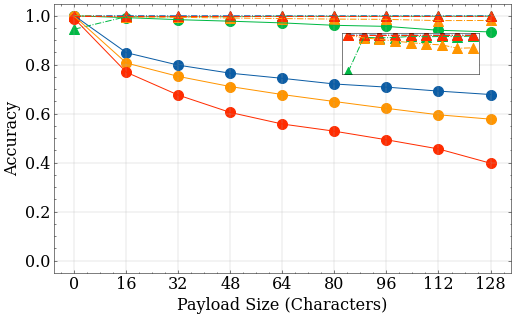

In [12]:
LOGS_DIR = os.path.join("logs_adversarial_evasion", "nl2bash_prepend")

fig, ax, _ = plot_stat(logdir=LOGS_DIR, stat="Accuracy", axins=False, legend=False)
ax.set_ylabel("Accuracy", fontsize=16)
ax.set_xlabel('Payload Size (Characters)', fontsize=16)

# make xtickslabels int instead of float
xticks = ax.get_xticks()
xticks = [int(x) for x in xticks]
ax.set_xticklabels(xticks, fontsize=16)

_ = ax.set_ylim([-0.05, 1.05])

#ax.legend(loc='lower left', fontsize=14)

# save as pdf in img
plt.savefig("img/adversarial_evasion_nl2bash_acc.pdf", bbox_inches='tight', dpi=300)

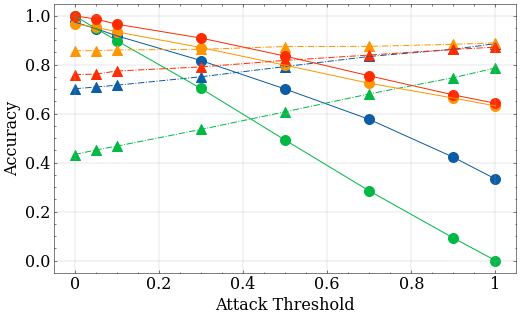

In [4]:
LOGS_DIR = os.path.join("logs_adversarial_evasion", "w_robust_training", "domain_knowledge_param_1")

fig, ax, axin = plot_stat(logdir=LOGS_DIR, stat="Accuracy", legend=False)
ax.set_ylabel("Accuracy", fontsize=16)
# xlabel represent attack parameter that represents random threshold [0, 1] of probability if to apply a modification
ax.set_xlabel("Attack Threshold", fontsize=16)

xl = [0, 0.2, 0.4, 0.6, 0.8, 1]
ax.set_xticks(xl)
ax.set_xticklabels(xl)
_ = ax.set_ylim([-0.05, 1.05])

# save as pdf in img
# plt.savefig("img/adversarial_evasion_domain_knowldge_acc.pdf", bbox_inches='tight', dpi=300)

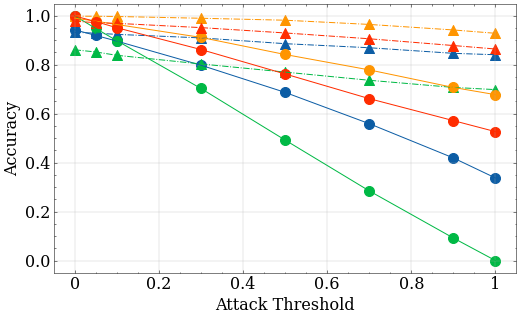

In [11]:
LOGS_DIR = os.path.join("logs_adversarial_evasion", "w_robust_training", "domain_knowledge_param_0.5")

fig, ax, axin = plot_stat(logdir=LOGS_DIR, stat="Accuracy", legend=False)
ax.set_ylabel("Accuracy", fontsize=16)
# xlabel represent attack parameter that represents random threshold [0, 1] of probability if to apply a modification
ax.set_xlabel("Attack Threshold", fontsize=16)

xl = [0, 0.2, 0.4, 0.6, 0.8, 1]
ax.set_xticks(xl)
ax.set_xticklabels(xl)
_ = ax.set_ylim([-0.05, 1.05])

# save as pdf in img
plt.savefig("img/adversarial_evasion_domain_knowldge_acc_with_robust_training_0.5.pdf", bbox_inches='tight', dpi=300)

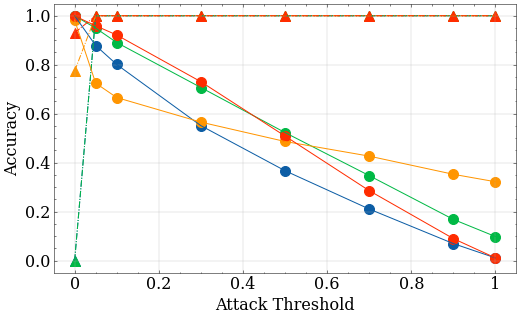

In [4]:
LOGS_DIR = os.path.join("logs_adversarial_evasion", "w_robust_training", "hybrid_param_0.5")

fig, ax, axin = plot_stat(logdir=LOGS_DIR, stat="Accuracy", legend=False)
ax.set_ylabel("Accuracy", fontsize=16)
# xlabel represent attack parameter that represents random threshold [0, 1] of probability if to apply a modification
ax.set_xlabel("Attack Threshold", fontsize=16)

xl = [0, 0.2, 0.4, 0.6, 0.8, 1]
ax.set_xticks(xl)
ax.set_xticklabels(xl)
_ = ax.set_ylim([-0.05, 1.05])

# save as pdf in img
# plt.savefig("img/adversarial_evasion_domain_knowldge_acc_with_robust_training_0.5.pdf", bbox_inches='tight', dpi=300)

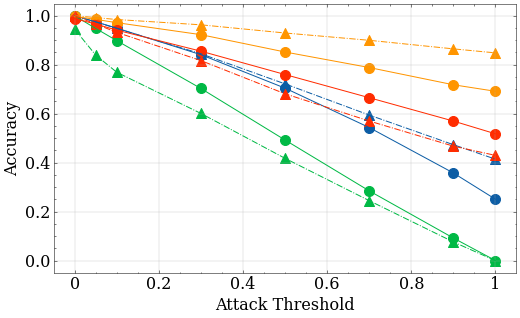

In [13]:
LOGS_DIR = os.path.join("logs_adversarial_evasion", "domain_knowledge")

fig, ax, axin = plot_stat(logdir=LOGS_DIR, stat="Accuracy", legend=False)
ax.set_ylabel("Accuracy", fontsize=16)
# xlabel represent attack parameter that represents random threshold [0, 1] of probability if to apply a modification
ax.set_xlabel("Attack Threshold", fontsize=16)

xl = [0, 0.2, 0.4, 0.6, 0.8, 1]
ax.set_xticks(xl)
ax.set_xticklabels(xl)
_ = ax.set_ylim([-0.05, 1.05])

# save as pdf in img
plt.savefig("img/adversarial_evasion_domain_knowldge_acc.pdf", bbox_inches='tight', dpi=300)

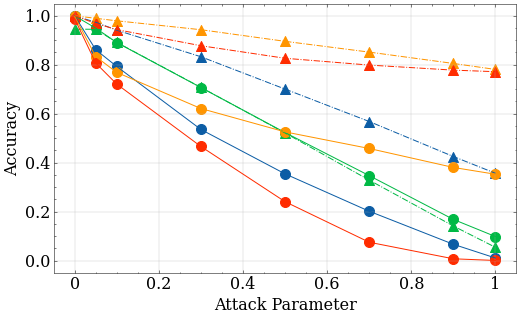

In [14]:
LOGS_DIR = os.path.join("logs_adversarial_evasion","hybrid")

fig, ax, axin = plot_stat(logdir=LOGS_DIR, stat="Accuracy", legend=False)
ax.set_ylabel("Accuracy", fontsize=16)
# xlabel represent attack parameter that represents random threshold [0, 1] of probability if to apply a modification
ax.set_xlabel("Attack Parameter", fontsize=16)

xl = [0, 0.2, 0.4, 0.6, 0.8, 1]
ax.set_xticks(xl)
ax.set_xticklabels(xl)
_ = ax.set_ylim([-0.05, 1.05])

# save as pdf in img
plt.savefig("img/adversarial_evasion_hybrid_acc.pdf", bbox_inches='tight', dpi=300)

### Legend

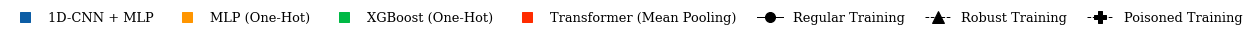

In [24]:
# Extract legend handles and labels from the existing axes
handles, labels = ax.get_legend_handles_labels()

# Extract colors from the original PathCollections
color1 = handles[0].get_facecolor()[0]
color3 = handles[2].get_facecolor()[0]
color2 = handles[1].get_facecolor()[0]
color4 = handles[3].get_facecolor()[0]

# Create new legend handles with the desired properties
custom_handles = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor=color1, markeredgecolor=color1, markersize=10),
    Line2D([0], [0], marker='s', color='w', markerfacecolor=color3, markeredgecolor=color3, markersize=10),
    Line2D([0], [0], marker='s', color='w', markerfacecolor=color2, markeredgecolor=color2, markersize=10),
    Line2D([0], [0], marker='s', color='w', markerfacecolor=color4, markeredgecolor=color4, markersize=10)
]

legend_elements = [
                    # Line2D([0], [0], marker='o', color='w', label='Original', markerfacecolor='k', markersize=11),
                    # Line2D([0], [0], marker='^', color='w', label='Robust', markerfacecolor='k', markersize=15),
                    # as above, but wil linestyles - and --
                    Line2D([0], [0], linestyle='-', marker='o', color='k', label='Original', linewidth=1, markersize=10),
                    Line2D([0], [0], linestyle='--', marker='^', color='k',  label='Adversarial', linewidth=1, markersize=12),
                    Line2D([0], [0], linestyle='--', marker='P', color='k',  label='Poisoned', linewidth=1, markersize=12),
                    ]
custom_handles.extend(legend_elements)
labels.extend(["Regular Training", "Robust Training", "Poisoned Training"])

# replace 1st and 2nd element in labels
temp = labels[1]
labels[1] = labels[2]
labels[2] = temp 

# Adjust the figure size to accommodate the legend, spanning three times the x size of 'ax'
xsize, ysize = fig.get_size_inches()
fig_leg = plt.figure(figsize=(xsize*2.5, 0.7))

# Add a subplot with no actual plot, only the legend
ax_leg = fig_leg.add_subplot(111)
ax_leg.axis('off')  # Ensure no axis or plot is displayed

leg = fig_leg.legend(custom_handles, labels, loc='upper left', mode='expand', ncol=7, fontsize=13, columnspacing=0.6)

# Show the figure with the legend
plt.show()

# If you want to save the legend as a PDF
fig_leg.canvas.draw()
#bbox = leg.get_window_extent().transformed(fig_leg.dpi_scale_trans.inverted())
fig_leg.savefig('img/adversarial_evasion_legend.pdf', dpi=300, bbox_inches='tight')

# Close the legend figure after saving and displaying
plt.close(fig_leg)